In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
PROJECT_DIRECTORY = '/Users/abhinavramalingam/Documents/Uppsala/IID/Assignments/assignment_2/'

In [5]:
dataset_file = PROJECT_DIRECTORY + 'dataset.csv'
data = pd.read_csv(dataset_file)  


X = data.drop(columns=['emotion'])
y = data['emotion']

y = pd.get_dummies(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [13]:
y_train.shape

(928, 7)

In [12]:
y_train.shape

(928, 7)

In [6]:
# Define the MLP model
model = Sequential()

# Input layer (number of features = X_train.shape[1])
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with ReLU activation
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer (number of classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,071 (15.90 KB)

 Trainable params: 4,071 (15.90 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1009 - loss: 2.0128 - val_accuracy: 0.4569 - val_loss: 1.7690
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5010 - loss: 1.7027 - val_accuracy: 0.5517 - val_loss: 1.4535
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5997 - loss: 1.3227 - val_accuracy: 0.5690 - val_loss: 1.2563
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.6002 - loss: 1.1506 - val_accuracy: 0.5862 - val_loss: 1.2137
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6503 - loss: 1.0603 - val_accuracy: 0.5862 - val_loss: 1.1924
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.6183 - loss: 1.0757 - val_accuracy: 0.5862 - val_loss: 1.1700
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.6452 - loss: 0.9988 - val_accuracy: 0.5862 - val_loss: 1.1631
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6532 - loss: 0.9985 - val_accura

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test.values, axis=1)

# Classification report and accuracy
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))
print(f"Test Accuracy: {accuracy_score(y_true_labels, y_pred_labels) * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6134 - loss: 1.1704  
Test Accuracy: 63.25%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.79      0.96      0.87        27
           4       0.54      0.84      0.66        37
           5       0.00      0.00      0.00         9
           6       0.75      0.63      0.69        19

    accuracy                           0.63       117
   macro avg       0.50      0.42      0.41       117
weighted avg       0.56      0.63      0.57       117

Test Accuracy: 63.25%


/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [9]:
# List of architectures to try (number of hidden layers and neurons)
neurons = [32, 48, 64, 128]  # Different number of neurons in hidden layers
hidden_layer_options = [1, 2, 3]  # Number of hidden layers to try
best_accuracy = 0
accuracies = []

# Iterate over different combinations of neurons and number of hidden layers
for num_layers in hidden_layer_options:
    for neuron in neurons:
        # Build a model with the current configuration
        model = Sequential()
        model.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
        for _ in range(num_layers - 1):  # Add the remaining hidden layers
            model.add(Dense(neuron // 2, activation='relu'))
        model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
        
        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                            validation_data=(X_val, y_val), callbacks=[early_stopping])
        
        # Evaluate on test set
        _, accuracy = model.evaluate(X_test, y_test)
        accuracies.append((num_layers, neuron, accuracy))  # Store the result

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

# Print the best accuracy
print(f"Best Model Test Accuracy: {best_accuracy * 100:.2f}%")

# Plotting the results
# Prepare the data for the plot (x-axis = neurons, y-axis = accuracy for each layer count)
accuracies_np = np.array(accuracies)
neurons_list = accuracies_np[:, 1]  # Neurons
accuracies_per_layers = {layer: [] for layer in hidden_layer_options}

for (num_layers, neuron, accuracy) in accuracies:
    accuracies_per_layers[num_layers].append((neuron, accuracy))



Epoch 1/50


/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1106 - loss: 2.1996 - val_accuracy: 0.1983 - val_loss: 1.9781
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.2866 - loss: 1.8317 - val_accuracy: 0.4310 - val_loss: 1.7284
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4937 - loss: 1.5514 - val_accuracy: 0.4828 - val_loss: 1.5755
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5118 - loss: 1.4382 - val_accuracy: 0.5431 - val_loss: 1.4745
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5662 - loss: 1.2911 - val_accuracy: 0.5431 - val_loss: 1.4138
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5434 - loss: 1.2811 - val_accuracy: 0.5259 - val_loss: 1.3699
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5719 - loss: 1.2182 - val_accuracy: 0.5431 - val_loss: 1.3398
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5987 - loss: 1.1553 - val_accuracy: 0.5603 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 2.0043 - val_accuracy: 0.4138 - val_loss: 1.6492
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.4781 - loss: 1.5398 - val_accuracy: 0.5172 - val_loss: 1.4474
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5227 - loss: 1.3531 - val_accuracy: 0.5517 - val_loss: 1.3429
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5445 - loss: 1.2563 - val_accuracy: 0.5690 - val_loss: 1.2885
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5987 - loss: 1.1596 - val_accuracy: 0.5690 - val_loss: 1.2529
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.6397 - loss: 1.0736 - val_accuracy: 0.5690 - val_loss: 1.2328
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6405 - loss: 1.0450 - val_accuracy: 0.5690 - val_loss: 1.2161
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6189 - loss: 1.0981 - val_accuracy: 0.5690 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1632 - loss: 1.9591 - val_accuracy: 0.3707 - val_loss: 1.5891
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4887 - loss: 1.4428 - val_accuracy: 0.5345 - val_loss: 1.3463
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5820 - loss: 1.2270 - val_accuracy: 0.5517 - val_loss: 1.2621
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.6114 - loss: 1.1244 - val_accuracy: 0.5603 - val_loss: 1.2266
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6328 - loss: 1.0638 - val_accuracy: 0.5431 - val_loss: 1.2100
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6299 - loss: 1.0589 - val_accuracy: 0.5345 - val_loss: 1.1985
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6315 - loss: 1.0455 - val_accuracy: 0.5345 - val_loss: 1.1938
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.6587 - loss: 0.9932 - val_accuracy: 0.5431 - val_loss

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3399 - loss: 1.7441 - val_accuracy: 0.4914 - val_loss: 1.4375
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5277 - loss: 1.3309 - val_accuracy: 0.5431 - val_loss: 1.2893
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5842 - loss: 1.1869 - val_accuracy: 0.5517 - val_loss: 1.2335
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6011 - loss: 1.0886 - val_accuracy: 0.5948 - val_loss: 1.2010
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5992 - loss: 1.0945 - val_accuracy: 0.5776 - val_loss: 1.1810
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6173 - loss: 1.0508 - val_accuracy: 0.5776 - val_loss: 1.1712
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6337 - loss: 1.0165 - val_accuracy: 0.5862 - val_loss: 1.1578
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6421 - loss: 0.9596 - val_accuracy: 0.5948 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3152 - loss: 1.7998 - val_accuracy: 0.4569 - val_loss: 1.6313
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.4899 - loss: 1.5111 - val_accuracy: 0.5086 - val_loss: 1.4919
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.5296 - loss: 1.3902 - val_accuracy: 0.5086 - val_loss: 1.4021
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.5912 - loss: 1.2575 - val_accuracy: 0.5172 - val_loss: 1.3465
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.6120 - loss: 1.1710 - val_accuracy: 0.5345 - val_loss: 1.3029
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6234 - loss: 1.1372 - val_accuracy: 0.5431 - val_loss: 1.2743
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.6092 - loss: 1.1226 - val_accuracy: 0.5259 - val_loss: 1.2545
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.6104 - loss: 1.0925 - val_accuracy: 0.5345 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0973 - loss: 2.1784 - val_accuracy: 0.1724 - val_loss: 1.8864
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.2983 - loss: 1.7857 - val_accuracy: 0.4224 - val_loss: 1.6441
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.4715 - loss: 1.5488 - val_accuracy: 0.5259 - val_loss: 1.4561
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5302 - loss: 1.3790 - val_accuracy: 0.5431 - val_loss: 1.3424
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.6105 - loss: 1.1762 - val_accuracy: 0.5603 - val_loss: 1.2744
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5923 - loss: 1.1475 - val_accuracy: 0.5517 - val_loss: 1.2370
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6027 - loss: 1.1035 - val_accuracy: 0.5431 - val_loss: 1.2156
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.6118 - loss: 1.0661 - val_accuracy: 0.5431 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 1.8800 - val_accuracy: 0.4914 - val_loss: 1.6363
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5308 - loss: 1.5005 - val_accuracy: 0.5345 - val_loss: 1.3870
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5654 - loss: 1.2240 - val_accuracy: 0.5603 - val_loss: 1.2833
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6010 - loss: 1.1277 - val_accuracy: 0.5431 - val_loss: 1.2327
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5958 - loss: 1.0878 - val_accuracy: 0.5690 - val_loss: 1.2090
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6237 - loss: 1.0386 - val_accuracy: 0.5603 - val_loss: 1.1931
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6307 - loss: 0.9966 - val_accuracy: 0.5776 - val_loss: 1.1844
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.6273 - loss: 0.9857 - val_accuracy: 0.5948 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2363 - loss: 1.8962 - val_accuracy: 0.5776 - val_loss: 1.4040
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.5632 - loss: 1.2350 - val_accuracy: 0.5517 - val_loss: 1.2573
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.6228 - loss: 1.0794 - val_accuracy: 0.5431 - val_loss: 1.2034
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.6244 - loss: 1.0398 - val_accuracy: 0.5517 - val_loss: 1.1677
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6393 - loss: 0.9813 - val_accuracy: 0.5517 - val_loss: 1.1661
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6275 - loss: 0.9712 - val_accuracy: 0.5862 - val_loss: 1.1507
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.6893 - loss: 0.8834 - val_accuracy: 0.5690 - val_loss: 1.1459
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6768 - loss: 0.8937 - val_accuracy: 0.5862 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0984 - loss: 1.9920 - val_accuracy: 0.3017 - val_loss: 1.8077
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.2453 - loss: 1.8233 - val_accuracy: 0.5086 - val_loss: 1.6606
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4905 - loss: 1.6353 - val_accuracy: 0.5086 - val_loss: 1.4696
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5848 - loss: 1.4114 - val_accuracy: 0.5431 - val_loss: 1.3330
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5657 - loss: 1.3075 - val_accuracy: 0.5776 - val_loss: 1.2595
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6024 - loss: 1.1960 - val_accuracy: 0.5948 - val_loss: 1.2196
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.6063 - loss: 1.1434 - val_accuracy: 0.6034 - val_loss: 1.2044
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6122 - loss: 1.0971 - val_accuracy: 0.6293 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2044 - loss: 1.9400 - val_accuracy: 0.3276 - val_loss: 1.7593
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.4015 - loss: 1.6228 - val_accuracy: 0.4397 - val_loss: 1.5227
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5066 - loss: 1.3678 - val_accuracy: 0.5517 - val_loss: 1.3589
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6108 - loss: 1.1933 - val_accuracy: 0.5948 - val_loss: 1.2899
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6165 - loss: 1.1401 - val_accuracy: 0.5690 - val_loss: 1.2371
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6216 - loss: 1.0850 - val_accuracy: 0.5690 - val_loss: 1.2118
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6305 - loss: 1.0223 - val_accuracy: 0.5862 - val_loss: 1.2059
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6603 - loss: 0.9793 - val_accuracy: 0.5690 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3448 - loss: 1.7856 - val_accuracy: 0.5259 - val_loss: 1.4951
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5817 - loss: 1.3898 - val_accuracy: 0.5431 - val_loss: 1.2996
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.6167 - loss: 1.1465 - val_accuracy: 0.5776 - val_loss: 1.2213
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6380 - loss: 1.0438 - val_accuracy: 0.5690 - val_loss: 1.1923
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.6223 - loss: 1.0246 - val_accuracy: 0.5862 - val_loss: 1.1750
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.6497 - loss: 0.9762 - val_accuracy: 0.5776 - val_loss: 1.1679
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.6584 - loss: 0.9464 - val_accuracy: 0.5776 - val_loss: 1.1564
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.6821 - loss: 0.9057 - val_accuracy: 0.6121 - val_lo

/Users/abhinavramalingam/Documents/Uppsala/IID/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 1.8540 - val_accuracy: 0.5690 - val_loss: 1.4639
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5666 - loss: 1.2672 - val_accuracy: 0.5603 - val_loss: 1.2290
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.6144 - loss: 1.0715 - val_accuracy: 0.5517 - val_loss: 1.2031
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.6609 - loss: 0.9715 - val_accuracy: 0.5862 - val_loss: 1.1803
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6497 - loss: 0.9452 - val_accuracy: 0.5948 - val_loss: 1.1665
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6578 - loss: 0.9190 - val_accuracy: 0.5948 - val_loss: 1.1656
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7061 - loss: 0.8502 - val_accuracy: 0.5862 - val_loss: 1.1674
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7023 - loss: 0.8157 - val_accuracy: 0.5776 - val_lo

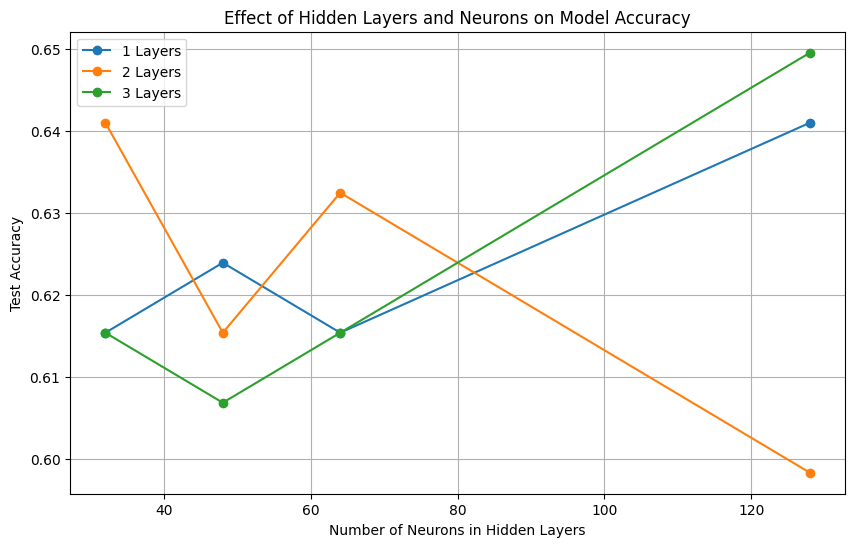

In [10]:
# Plot the graph
plt.figure(figsize=(10, 6))
for num_layers, results in accuracies_per_layers.items():
    neurons_vals, accuracies_vals = zip(*results)
    plt.plot(neurons_vals, accuracies_vals, label=f'{num_layers} Layers', marker='o')

plt.xlabel('Number of Neurons in Hidden Layers')
plt.ylabel('Test Accuracy')
plt.title('Effect of Hidden Layers and Neurons on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Load the test_to_submit.csv (without the 'emotion' column)
test_to_submit = pd.read_csv('test_to_submit.csv')

# Preprocess the test data (standardize)
test_to_submit = scaler.transform(test_to_submit)

# Predict using the trained model
test_predictions = model.predict(test_to_submit)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a DataFrame for submission
submission = pd.DataFrame(predicted_labels, columns=['emotion'])

# Map back the predicted label indices to emotion names (assuming labels are indexed 0, 1, 2, etc.)
emotion_labels = list(y.columns)  # Get the emotion classes from the training set
submission['emotion'] = submission['emotion'].map(lambda x: emotion_labels[x])

# Save the submission file
submission.to_csv('submission.csv', index=False)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
